# Chapter: Dimension Reduction and Latent Variable Methods (Part 2)¶¶

# Topic: Dimension Reduction via ICA 

In [1]:
##%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
##                          ICA model for TEP data
## %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%

In [2]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# fetch TE data
TEdata_noFault_train = np.loadtxt('d00.dat').T # data arrangement in d00.dat is different than that in other files

# select variables as done in Lee et al.
xmeas = TEdata_noFault_train[:,0:22]
xmv = TEdata_noFault_train[:,41:52]
data_noFault_train = np.hstack((xmeas, xmv))

In [4]:
# scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_train_normal = scaler.fit_transform(data_noFault_train)

In [5]:
# fit ICA model 
from sklearn.decomposition import FastICA
ica = FastICA(max_iter=1000, tol=0.005, random_state=1).fit(data_train_normal)
W = ica.components_

In [6]:
# confirm L2 norm of all IC scores is 1
S = ica.transform(data_train_normal)
S_L2_norms = np.linalg.norm(S, 2, axis = 0) 

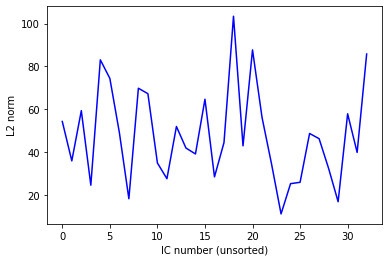

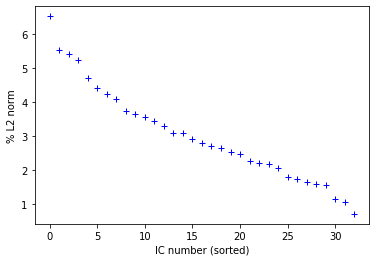

In [7]:
# sort the ICs in importance order using L2 norm of each row 
L2_norm = np.linalg.norm(W, 2, axis=1)
sort_order = np.flip(np.argsort(L2_norm)) # descending order
L2_norm_sorted_pct = 100*L2_norm[sort_order]/np.sum(L2_norm)

plt.figure()
plt.plot(L2_norm, 'b')
plt.xlabel('IC number (unsorted)')
plt.ylabel('L2 norm')
plt.show()

plt.figure()
plt.plot(L2_norm_sorted_pct, 'b+')
plt.xlabel('IC number (sorted)')
plt.ylabel('% L2 norm')
plt.show()

W_sorted = W[sort_order,:] # row 1 now corresponds to the most important IC and so on

In [8]:
# decide # of ICs to retain via PCA variance method and compute ICs
from sklearn.decomposition import PCA
pca = PCA().fit(data_train_normal)

explained_variance = 100*pca.explained_variance_ratio_ # in percentage
cum_explained_variance = np.cumsum(explained_variance) # cumulative % variance explained

n_comp = np.argmax(cum_explained_variance >= 90) + 1

print('Number of PCs cumulatively explaining atleast 90% variance: ', n_comp)

Number of PCs cumulatively explaining atleast 90% variance:  17


In [9]:
# compute ICs with reduced dimension
Wd = W_sorted[0:n_comp,:]
Sd = np.dot(Wd, data_train_normal.T) # row 1 contains scores of the most important IC